In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')
data.head(2)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,2022-10-31,1,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,2022-11-30,2,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,...,4,2,3,2,0,0,4,2,697.0,0


In [8]:
data.shape

(566102, 49)

In [9]:
data.columns

Index(['DISBMONTH', 'LOAN_NUMBER', 'CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC',
       'PAYMENT_TYPE', 'CUST_PINCODE', 'CUST_STATE', 'MANUFACTURE_CODE',
       'TENUR', 'ADVANCE_EMI_COUNT', 'EMI', 'LTV', 'ASSET_COST',
       'ACTUAL_LOAN_AMOUNT', 'DOWN_PAYMENT', 'PAYNIMO_STATUS', 'QUALIFICATION',
       'GENDER', 'MARITALSTATUS', 'CUST_AGE', 'EMP_GRP', 'MATCH_SCORE',
       'TOTAL_NO_LV_TRADELINES', 'BUREAU_VINTAGE_IN_MONTHS',
       'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_CD',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_AL',
       'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC',
       'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_LV_UNSEC',
       'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M',
       'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_SEC',
       'TOTAL_NO_ENQ_SEC_LAST_3M', 'TOTAL_NO_ENQ_UNSEC',
       'TOTAL_NO_ENQ_UNSEC_LAST_3M', 

In [11]:
data.TARGET_VARIABLE.unique()

array([0, 1])

In [10]:
# Display basic statistics
dec = data.describe()
dec.style.background_gradient(cmap='Wistia')

,DISBMONTH,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,MATCH_SCORE,TOTAL_NO_LV_TRADELINES,BUREAU_VINTAGE_IN_MONTHS,NO_TRADELINES_OPENED_LAST_3M,TOTAL_NO_LV_CD,TIME_SINCE_FIRST_CD_MONTHS,NO_CD_OPENED_LAST_3M,TOTAL_NO_LV_CC,NO_CC_OPENED_LAST_3M,TOTAL_NO_LV_PLBL,TOTAL_NO_LV_AL,TOTAL_NO_LV_TW,TOTAL_NO_LV_TL,TOTAL_NO_LV_SEC,TOTAL_NO_SEC_OPENED_LAST_3M,TOTAL_NO_LV_UNSEC,TOTAL_NO_UNSEC_OPENED_LAST_3M,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
count,566102,566102.000000,566099.000000,566100.000000,566100.000000,566100.000000,566100.000000,566100.000000,566089.000000,566100.000000,566093.000000,223623.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,566102.000000,498824.000000,566102.000000
mean,2023-06-30 10:14:42.642350336,283051.500000,537719.154238,9.541895,1.780558,2454.616101,77.760002,23237.389912,18872.716928,5944.517543,32.697308,87.215380,1.019783,19.382708,0.303062,0.367059,7.773097,0.096234,0.051568,0.006850,0.328527,0.020929,0.071441,0.003766,0.231382,0.058424,0.684815,0.222797,3.609517,1.131545,1.468910,0.570095,0.371831,0.068436,2.887070,0.993346,393.719773,0.031408
min,2022-10-31 00:00:00,1.000000,110001.000000,6.000000,0.000000,565.000000,0.000000,7290.000000,4273.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2023-03-31 00:00:00,141526.250000,414403.000000,8.000000,1.000000,1772.000000,71.420000,14999.000000,12497.000000,3535.000000,25.000000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,2023-06-30 00:00:00,283051.500000,560045.000000,10.000000,2.000000,2203.000000,75.000000,19500.000000,16214.000000,4999.000000,31.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,710.000000,0.000000
75%,2023-10-31 00:00:00,424576.750000,700061.000000,12.000000,3.000000,2913.000000,85.080000,28000.000000,22680.000000,7385.000000,38.000000,99.000000,1.000000,24.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,747.000000,0.000000
max,2023-12-31 00:00:00,566102.000000,855117.000000,36.000000,8.000000,18538.000000,100.000000,246000.000000,200699.000000,139447.000000,64.000000,100.000000,93.000000,646.000000,101.000000,23.000000,281.000000,15.000000,18.000000,4.000000,84.000000,10.000000,6.000000,6.000000,37.000000,101.000000,74.000000,95.000000,280.000000,96.000000,86.000000,43.000000,63.000000,23.000000,229.000000,87.000000,844.000000,1.000000
std,nan,163419.715382,189758.954784,2.696810,1.480499,966.984580,11.043139,11139.952448,8990.874324,4261.515082,8.793037,24.829342,2.217677,35.313071,1.167107,0.913973,17.733225,0.386070,0.369729,0.090918,1.159600,0.163570,0.275880,0.068108,0.788136,0.466071,1.727209,0.993663,7.733291,2.538173,2.742567,1.199023,1.238902,0.417529,6.571909,2.280961,373.326962,0.174417


In [12]:
# Display the first few rows of the dataset
data.head(3)

,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,2022-10-31,1,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,2022-11-30,2,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,...,4,2,3,2,0,0,4,2,697.0,0
2,2022-10-31,3,MOBILE,MOBILE,ETC,ENCH,517132.0,AP,OPPO,8.0,...,0,0,0,0,0,0,0,0,759.0,0


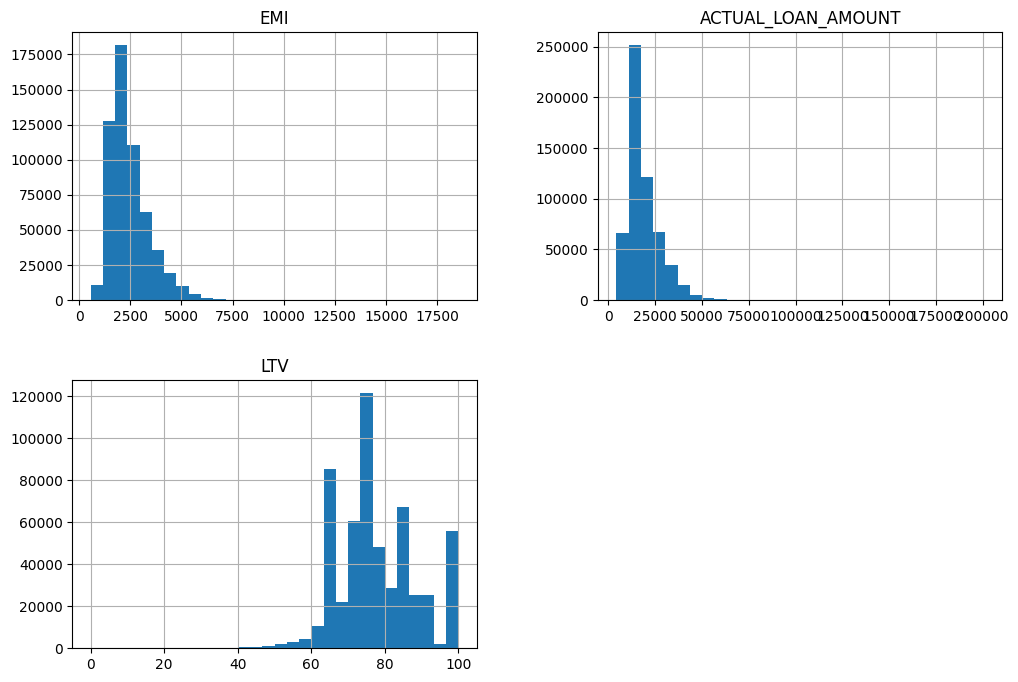

In [13]:
import matplotlib.pyplot as plt

# Plot histogram for numerical features: checking the skewness and data pattern
data[['EMI', 'ACTUAL_LOAN_AMOUNT', 'LTV']].hist(bins=30, figsize=(12, 8))
plt.show()

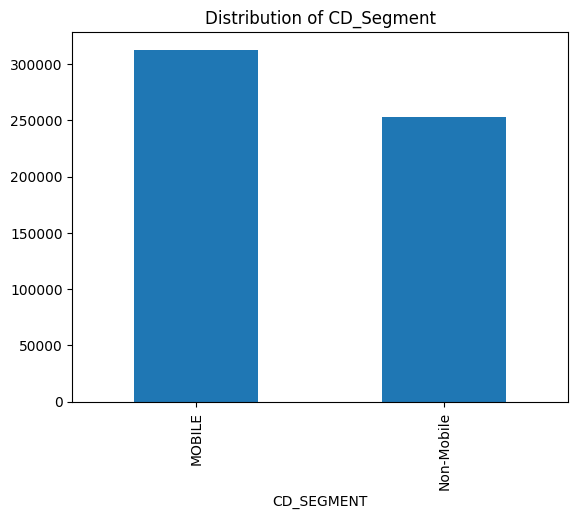

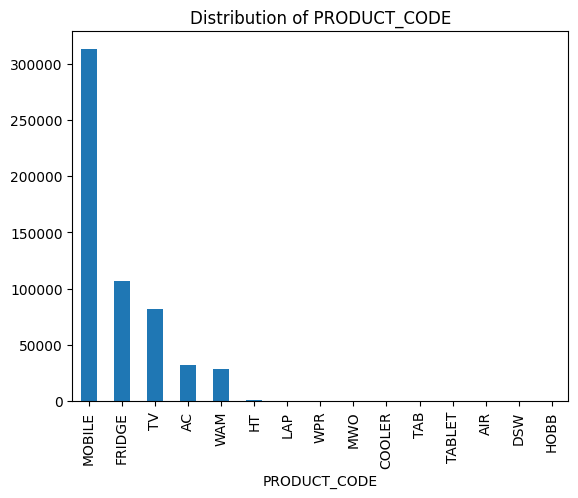

In [14]:
data['CD_SEGMENT'].value_counts().plot(kind='bar')
plt.title('Distribution of CD_Segment')
plt.show()

data['PRODUCT_CODE'].value_counts().plot(kind='bar')
plt.title('Distribution of PRODUCT_CODE')
plt.show()


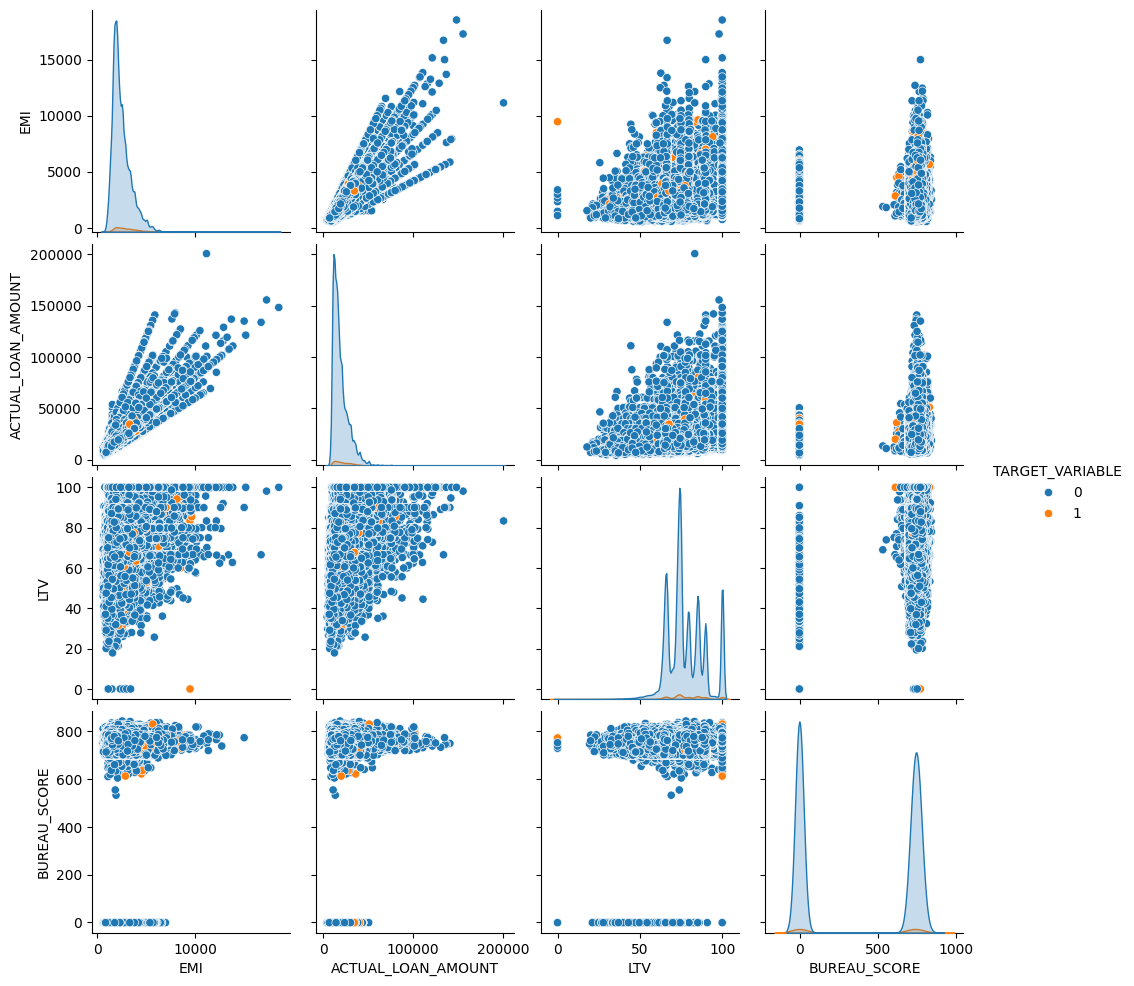

In [15]:
import seaborn as sns
sns.pairplot(data[['EMI', 'ACTUAL_LOAN_AMOUNT', 'LTV', 'BUREAU_SCORE','TARGET_VARIABLE']],hue='TARGET_VARIABLE')
plt.show()


# **2. Data Preprocessing and Feature Engineering**

In [16]:
num_cols = data.select_dtypes('number')
num_cols

,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,1,517551.0,7.0,1.0,2490.0,83.00,17999.0,14939.0,3885.0,47.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,2,517002.0,6.0,0.0,4350.0,100.00,25500.0,26100.0,635.0,39.0,...,4,2,3,2,0,0,4,2,697.0,0
2,3,517132.0,8.0,2.0,3825.0,74.50,29999.0,22949.0,9023.0,22.0,...,0,0,0,0,0,0,0,0,759.0,0
3,4,517130.0,7.0,1.0,1942.0,85.05,12990.0,11648.0,3315.0,22.0,...,2,1,2,1,0,0,2,1,775.0,0
4,5,515212.0,7.0,1.0,3372.0,85.34,22999.0,20227.0,4079.0,47.0,...,8,2,2,0,2,0,4,0,708.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566097,566098,731238.0,12.0,4.0,3788.0,65.56,44000.0,30297.0,15859.0,41.0,...,0,0,0,0,0,0,0,0,-1.0,0
566098,566099,731302.0,10.0,2.0,3308.0,69.95,32000.0,23684.0,9970.0,30.0,...,0,0,0,0,0,0,0,0,-1.0,0
566099,566100,742302.0,10.0,1.0,2145.0,89.28,20000.0,19304.0,2440.0,47.0,...,0,0,0,0,0,0,0,0,761.0,0
566100,566101,721144.0,10.0,1.0,6051.0,87.90,50000.0,49375.0,6287.0,24.0,...,30,2,18,0,0,0,24,2,775.0,0


In [17]:
data.isna().sum()

,0
DISBMONTH,0
LOAN_NUMBER,0
CD_SEGMENT,0
PRODUCT_CODE,2
ETC_NTC,0
PAYMENT_TYPE,2
CUST_PINCODE,3
CUST_STATE,0
MANUFACTURE_CODE,2
TENUR,2


In [18]:
missing_counts = data.isna().sum()
missing_percentage = (missing_counts / len(data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentage
})

In [19]:
# missing value Percentage
missing_data

,Missing Values,Percentage (%)
DISBMONTH,0,0.000000
LOAN_NUMBER,0,0.000000
CD_SEGMENT,0,0.000000
PRODUCT_CODE,2,0.000353
ETC_NTC,0,0.000000
PAYMENT_TYPE,2,0.000353
CUST_PINCODE,3,0.000530
CUST_STATE,0,0.000000
MANUFACTURE_CODE,2,0.000353
TENUR,2,0.000353


In [20]:
# lets deal with missing values
# MATCH_SCORE contains 60% missing data
data['MATCH_SCORE'] = data['MATCH_SCORE'].fillna(data['MATCH_SCORE'].mean())

In [21]:
data['PAYNIMO_STATUS'] = data['PAYNIMO_STATUS'].fillna('UKNOWN')

In [22]:
data['BUREAU_SCORE'] = data['BUREAU_SCORE'].fillna(data['BUREAU_SCORE'].mean())

In [23]:
data['QUALIFICATION'] = data['QUALIFICATION'].fillna('UNKNOWN')

In [24]:
# data size before dropna
data.shape

(566102, 49)

In [25]:
# drop remaining values
data.dropna(inplace=True)  # Drop rows with missing values

In [26]:
# create a replica of original
df = data.copy()

In [27]:
# check a new shape after dropna
data.shape

(566081, 49)

In [29]:
# FEATURE SELECTION
num_cols = df.select_dtypes(include=['number']).columns.tolist()
correlation_matrix = df.loc[:,num_cols].corr()

target_corr = correlation_matrix['TARGET_VARIABLE'].sort_values(ascending=False)
target_corr

,TARGET_VARIABLE
TARGET_VARIABLE,1.000000
TOTAL_NO_ENQ_CD_LAST_3M,0.104277
TOTAL_NO_ENQ_LAST_3M,0.093329
TOTAL_NO_ENQ_UNSEC_LAST_3M,0.091305
EMI,0.088025
TOTAL_NO_ENQ_CD,0.073970
ACTUAL_LOAN_AMOUNT,0.065576
ASSET_COST,0.061110
TOTAL_NO_ENQ_UNSEC,0.052349
NO_CD_OPENED_LAST_3M,0.050475


In [30]:
data[:2]

,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,2022-10-31,1,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,2022-11-30,2,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,...,4,2,3,2,0,0,4,2,697.0,0


In [31]:
# select all Categorical columns and check unique records
o_col = data.select_dtypes(object).columns
for val in o_col:
  print(val,':',data[val].unique())

CD_SEGMENT : ['MOBILE' 'Non-Mobile']
PRODUCT_CODE : ['MOBILE' 'AC' 'TV' 'FRIDGE' 'WAM' 'MWO' 'HT' 'WPR' 'TAB' 'COOLER' 'LAP'
 'DSW' 'TABLET' 'AIR' 'HOBB']
ETC_NTC : ['NTC' 'ETC']
PAYMENT_TYPE : ['ADM' 'ENCH' 'ACH' 'UPI']
CUST_STATE : ['AP' 'AS' 'BH' 'CH' 'CT' 'DL' 'GA' 'GJ' 'HR' 'JH' 'KA' 'KL' 'MH' 'MP'
 'OR' 'PB' 'PY' 'RJ' 'TN' 'TS' 'UK' 'UP' 'WB']
MANUFACTURE_CODE : ['OPPO' 'SAMSUNG' 'VIVO' 'LG' 'XIAOMI' 'GODREJ' 'WHIRL  POOL' 'HYUNDAIELE'
 'WILLETT' 'LLOYD' 'VOLTAS' 'SONY' 'SKYWORTH' 'HAIER' 'HITACHI' 'NOKIA'
 'DAIKIN' 'REALME' 'SANSUI' 'PANASONIC' 'INTEX' 'BOSCH' 'VOLTBEK' 'APPLE'
 'IFB' 'TECNO' 'VYOM' 'SYMPHONY' 'BLUESTAR' 'HP' 'FUJITSUGEN' 'ONIDA'
 'AMSTRAD' 'IAIR' 'CLARION' 'AKAI' 'TCL' 'CDOEM' 'CROMA' 'KELVINATOR'
 'IVEE' 'OSSYWUD' 'IMPEX' 'SIEMENS' 'YARA' 'PHILIPS' 'OSCAR' 'PANORAMA']
PAYNIMO_STATUS : ['VALID' 'INVALID' 'UKNOWN' 'IMPS_ERROR' 'PENDING']
QUALIFICATION : ['SSC' 'GRADUATE' '12TH' 'UNDER GRADUATE' 'OTHERS' 'POST-GRADUATE'
 'PROFESSIONAL' 'UNKNOWN' 'PG' 'HSC' 'GRAD'

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in o_col:
   data[i] = lb.fit_transform(data[i])

In [33]:
data.dtypes

,0
DISBMONTH,datetime64[ns]
LOAN_NUMBER,int64
CD_SEGMENT,int64
PRODUCT_CODE,int64
ETC_NTC,int64
PAYMENT_TYPE,int64
CUST_PINCODE,float64
CUST_STATE,int64
MANUFACTURE_CODE,int64
TENUR,float64


In [34]:
# Feature selection usinf f_classif
from sklearn.feature_selection import f_classif

# Extract features and target
X = data.drop(columns=['TARGET_VARIABLE','DISBMONTH'])
y = data['TARGET_VARIABLE']

# Apply ANOVA F-value test
f_values, p_values = f_classif(X, y)

# Create DataFrame to display results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Display features with low p-value
print("ANOVA F-Value and P-Value:")
print(anova_results.sort_values(by='P-Value'))

ANOVA F-Value and P-Value:
                          Feature      F-Value        P-Value
45     TOTAL_NO_ENQ_UNSEC_LAST_3M  4758.860597   0.000000e+00
44             TOTAL_NO_ENQ_UNSEC  1555.538163   0.000000e+00
41        TOTAL_NO_ENQ_CD_LAST_3M  6223.043479   0.000000e+00
40                TOTAL_NO_ENQ_CD  3114.334527   0.000000e+00
5                    CUST_PINCODE  2399.027344   0.000000e+00
39           TOTAL_NO_ENQ_LAST_3M  4974.032457   0.000000e+00
10                            EMI  4420.477534   0.000000e+00
12                     ASSET_COST  2121.928698   0.000000e+00
13             ACTUAL_LOAN_AMOUNT  2444.794913   0.000000e+00
27           NO_CD_OPENED_LAST_3M  1445.905516  5.598003e-316
38                   TOTAL_NO_ENQ  1403.978460  6.853026e-307
25                 TOTAL_NO_LV_CD  1067.540140  6.203878e-234
43       TOTAL_NO_ENQ_SEC_LAST_3M   969.075740  1.433762e-212
37  TOTAL_NO_UNSEC_OPENED_LAST_3M   672.997150  2.721924e-148
0                     LOAN_NUMBER   503.035

Based on the results from the ANOVA F-value and p-value analysis, we can draw several conclusions about the importance of features in relation to the target variable. Here's a summary of what these values indicate and how you might interpret them:

### **Interpretation of Results**

1. **Features with High F-Value and Low P-Value**

   - Features like `TOTAL_NO_ENQ_UNSEC_LAST_3M`, `TOTAL_NO_ENQ_UNSEC`, `TOTAL_NO_ENQ_CD_LAST_3M`, and others have extremely high F-values and very low p-values (close to 0). This suggests these features have a strong relationship with the target variable and are highly significant.
   - **Conclusion**: These features are likely very important for predicting the target variable and should be considered crucial for your model.

2. **Features with Moderate F-Value and Low P-Value**

   - Features such as `EMI`, `ASSET_COST`, `ACTUAL_LOAN_AMOUNT`, and `CUST_PINCODE` also have high F-values and low p-values, although not as extreme as the top features.
   - **Conclusion**: These features are also significant and contribute meaningfully to predicting the target variable, though they might be slightly less influential than those with the highest F-values.

3. **Features with Low P-Value but Low F-Value**

   - Features like `PRODUCT_CODE`, `PAYNIMO_STATUS`, and `TOTAL_NO_SEC_OPENED_LAST_3M` have low p-values but also low F-values. This suggests that while these features are statistically significant, their impact on the target variable is relatively small.
   - **Conclusion**: These features might still be important, but their contribution is less substantial compared to others with higher F-values.

4. **Features with High P-Value**

   - Features such as `TOTAL_NO_SEC_OPENED_LAST_3M`, `NO_CC_OPENED_LAST_3M`, and others have high p-values, indicating that they do not have a statistically significant relationship with the target variable.
   - **Conclusion**: These features are likely less relevant for predicting the target variable and might be candidates for removal or further investigation.

In [35]:
highly_significant_features = [
    'TOTAL_NO_ENQ_UNSEC_LAST_3M',
    'TOTAL_NO_ENQ_UNSEC',
    'TOTAL_NO_ENQ_CD_LAST_3M',
    'TOTAL_NO_ENQ_CD',
    'CUST_PINCODE',
    'TOTAL_NO_ENQ_LAST_3M',
    'EMI',
    'ASSET_COST',
    'ACTUAL_LOAN_AMOUNT']

moderately_significant_features = [
    'NO_CD_OPENED_LAST_3M',
    'TOTAL_NO_ENQ',
    'TOTAL_NO_LV_CD',
    'TOTAL_NO_ENQ_SEC_LAST_3M',
    'TOTAL_NO_UNSEC_OPENED_LAST_3M']
potentially_significant_features = [
    'QUALIFICATION',
    'ETC_NTC',
    'TOTAL_NO_LV_TL',
    'BUREAU_SCORE',
    'MATCH_SCORE']

features_to_include = highly_significant_features + moderately_significant_features + potentially_significant_features
features_to_include


['TOTAL_NO_ENQ_UNSEC_LAST_3M',
 'TOTAL_NO_ENQ_UNSEC',
 'TOTAL_NO_ENQ_CD_LAST_3M',
 'TOTAL_NO_ENQ_CD',
 'CUST_PINCODE',
 'TOTAL_NO_ENQ_LAST_3M',
 'EMI',
 'ASSET_COST',
 'ACTUAL_LOAN_AMOUNT',
 'NO_CD_OPENED_LAST_3M',
 'TOTAL_NO_ENQ',
 'TOTAL_NO_LV_CD',
 'TOTAL_NO_ENQ_SEC_LAST_3M',
 'TOTAL_NO_UNSEC_OPENED_LAST_3M',
 'QUALIFICATION',
 'ETC_NTC',
 'TOTAL_NO_LV_TL',
 'BUREAU_SCORE',
 'MATCH_SCORE']

In [36]:
# update data with new feature selection

data2 = data[features_to_include]   #contains inputs only
data2[:2]

,TOTAL_NO_ENQ_UNSEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_CD,CUST_PINCODE,TOTAL_NO_ENQ_LAST_3M,EMI,ASSET_COST,ACTUAL_LOAN_AMOUNT,NO_CD_OPENED_LAST_3M,TOTAL_NO_ENQ,TOTAL_NO_LV_CD,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_UNSEC_OPENED_LAST_3M,QUALIFICATION,ETC_NTC,TOTAL_NO_LV_TL,BUREAU_SCORE,MATCH_SCORE
0,0,0,0,0,517551.0,0,2490.0,17999.0,14939.0,0,0,0,0,0,18,1,0,-1.0,87.21538
1,2,4,2,3,517002.0,2,4350.0,25500.0,26100.0,1,4,1,0,1,18,0,0,697.0,87.21538


In [37]:
data2.shape

(566081, 19)

###  Outlier Detection and Handling

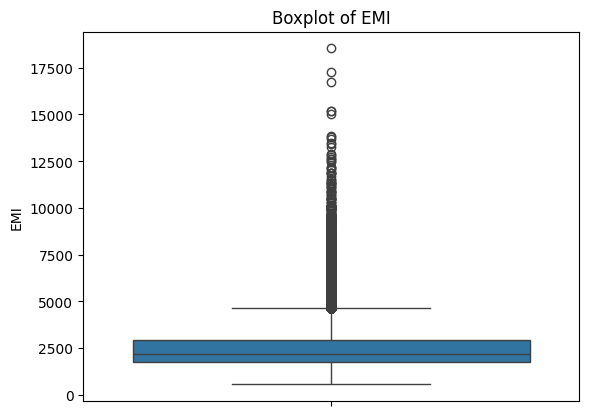

In [38]:
# Boxplot to detect outliers in EMI
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['EMI'])
plt.title('Boxplot of EMI')
plt.show()

In [39]:
y.value_counts()

,count
TARGET_VARIABLE,
0,548302
1,17779


In [40]:
y.shape

(566081,)

In [41]:
data2.shape

(566081, 19)

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [43]:
# after Resampling class distribustion
y_resampled.value_counts()

,count
TARGET_VARIABLE,
0,438690
1,438690


In [44]:
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [45]:
y_test_resampled.value_counts()

,count
TARGET_VARIABLE,
0,109612
1,109612


# **3. Model Selection and Training**
### a. Splitting Data:

In [46]:
X_resampled[:2]

,TOTAL_NO_ENQ_UNSEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_CD,CUST_PINCODE,TOTAL_NO_ENQ_LAST_3M,EMI,ASSET_COST,ACTUAL_LOAN_AMOUNT,NO_CD_OPENED_LAST_3M,TOTAL_NO_ENQ,TOTAL_NO_LV_CD,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_UNSEC_OPENED_LAST_3M,QUALIFICATION,ETC_NTC,TOTAL_NO_LV_TL,BUREAU_SCORE,MATCH_SCORE
0,1,2,1,1,413104.0,1,2225.0,13999.0,13344.0,0,4,2,0,0,7,0,0,758.0,87.21538
1,2,2,1,1,515211.0,2,1943.0,15999.0,15850.0,0,3,0,0,1,14,0,0,756.0,99.00000


In [47]:
y_resampled[:2]

,TARGET_VARIABLE
0,0
1,0


# **b. Model Training and Evaluation:**
### i. Logistic Regression:

In [48]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
log_model = LogisticRegression()
log_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = log_model.predict(X_test_resampled)
print(confusion_matrix(y_test_resampled, y_pred))
print(classification_report(y_test_resampled, y_pred))

[[70195 39417]
 [40638 68974]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64    109612
           1       0.64      0.63      0.63    109612

    accuracy                           0.63    219224
   macro avg       0.63      0.63      0.63    219224
weighted avg       0.63      0.63      0.63    219224



### ii. Random Forest:

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = rf_model.predict(X_test_resampled)
print(confusion_matrix(y_test_resampled, y_pred))
print(classification_report(y_test_resampled, y_pred))

[[107300   2312]
 [ 26915  82697]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88    109612
           1       0.97      0.75      0.85    109612

    accuracy                           0.87    219224
   macro avg       0.89      0.87      0.86    219224
weighted avg       0.89      0.87      0.86    219224



### iii. Gradient Boosting Machines (GBM):

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = gbm_model.predict(X_test_resampled)
print(confusion_matrix(y_test_resampled, y_pred))
print(classification_report(y_test_resampled, y_pred))

[[100298   9314]
 [ 17552  92060]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    109612
           1       0.91      0.84      0.87    109612

    accuracy                           0.88    219224
   macro avg       0.88      0.88      0.88    219224
weighted avg       0.88      0.88      0.88    219224

